In [2]:
import cv2
from google.colab.patches import cv2_imshow
from imutils.object_detection import non_max_suppression
from imutils import resize
import numpy as np

In [3]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [4]:
img = cv2.imread('/content/drive/MyDrive/Internship/Dataset/v4-460px-Cross-the-Street-Step-4-Version-4.jpg')
img = resize(img,height=500)

In [5]:
rects,weights = hog.detectMultiScale(img,winStride=(4,4),padding=(8,8),scale=1.05)

In [6]:
copy = img.copy()
for x,y,w,h in rects:
    cv2.rectangle(copy,(x,y),(x+w,y+h),(0,0,255),2)

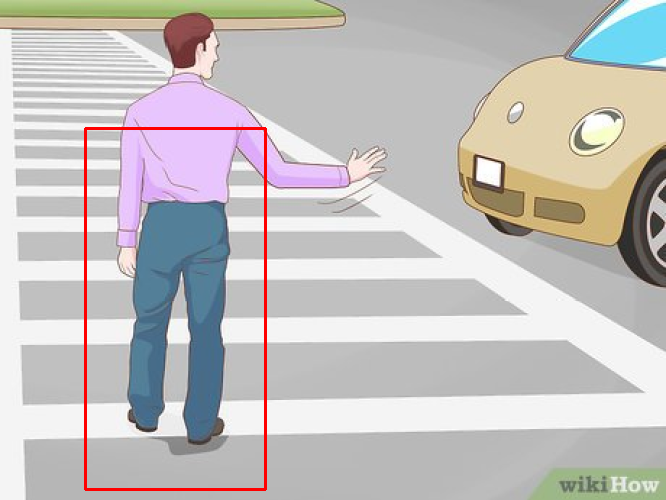

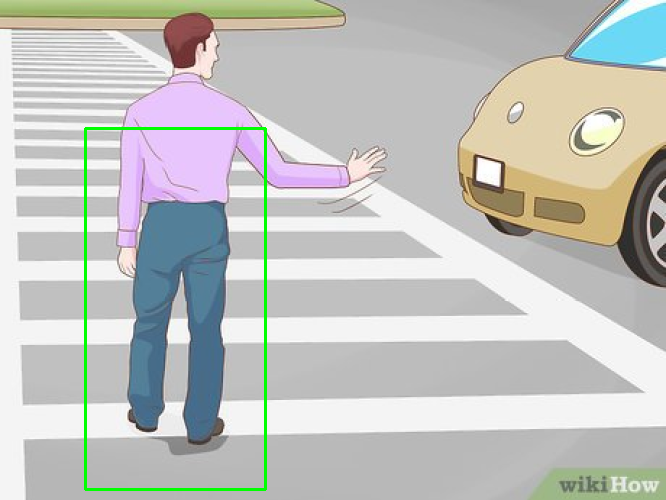

In [7]:
cv2_imshow(copy)
cv2.waitKey(0)

r = np.array([[x,y,x+w,y+h] for x,y,w,h in rects])
pick = non_max_suppression(r,probs=None,overlapThresh=0.65)    

for xa,ya,xb,yb in pick:
    cv2.rectangle(img,(xa,ya),(xb,yb),(0,255,0),2)
cv2_imshow(img)
cv2.waitKey(0)


cv2.destroyAllWindows()